In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import mediapipe as mp
from scipy import signal

#Show plots inline 
%matplotlib inline


In [4]:
#video configuration
video_path = r"C:\Users\Ghufran\Desktop\W0101\2024W0101P001.MOV"

In [5]:
#Choose whether to show debug images
SHOW_DEBUG_IMAGES = True

In [7]:
#Mediapipe face Mesh setup 
mp_face_mesh = mp.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

In [8]:
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise RuntimeError(f"Cannot open video:{video_path }")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
duration_sec = frame_count / fps if fps>0 else None

print(f"Video_path: {video_path}")
print(f"Resolutions : {width} x {height}")
print(f"FPS : {fps}")
print(f"Total frames : {frame_count}")
print(f"Duration (sec) : {duration_sec:.2f}")

Video_path: C:\Users\Ghufran\Desktop\W0101\2024W0101P001.MOV
Resolutions : 1920 x 1080
FPS : 59.94005994005994
Total frames : 11100
Duration (sec) : 185.19


In [11]:
#Read amiddle frame for visualization
mid_frame_idx = frame_count//2
cap.set(cv2.CAP_PROP_POS_FRAMES, mid_frame_id)
ret, frame_bgr = cap.read()

if not ret:
    raise RuntimeError(f"Cannot read frame at index {mid_frame_id} from video:{video_path }") 
      

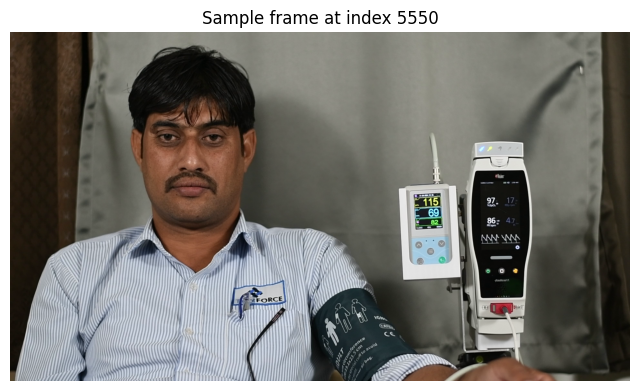

In [13]:
#convert BGR (opncv default) to RGB for plotting
frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (8,6))
plt.imshow(frame_rgb)
plt.title(f"Sample frame at index {mid_frame_idx}")
plt.axis("off")
plt.show()

In [14]:
#Reset video tothe begining for later processing
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

True

In [ ]:
# ==== Run FceMesh on the sample frame and visualize landmarks ===

image_rgb = frame_rgb.copy()
h,w,_ = image_rgb.shape

In [ ]:
# Mediapipe expects RGB image

results = face_mesh.process(image_rgb)

if not results.multi_face_landmarks:
    raise RuntimeError("No face landmarks detected in the sample frame")

face_landmarks = results.multi_face_landmarks[0]

c:\Users\Ghufran\anaconda3\envs\roi_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
